# COMP-4730 Project 1: Convolutional Neural Network on MNIST Dataset
Submitted by: Saffa Alvi, Nour ElKott, Nandini Patel <br>
October 22, 2021 <br>

This file contains the source code for our CNN architecture and 
shows the application of our model to the MNIST dataset.

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Public API for tf.keras.datasets.mnist namespace - import TensorFlow and MNIST dataset under the Keras API
mnist = tf.keras.datasets.mnist # 0-9, 28x28 images, 1 colour channel

Separated as train and test, separates the labels/classes and the images.<br>
X_train and X_test parts contain greyscale RGB codes (from 0 to 255).<br>
Y_train and Y_test parts contain labels from 0 to 9 for the image number.

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

In [4]:
print("Train dataset size: ", X_train.shape)
print("Test dataset size: ", X_test.shape)

Train dataset size:  (60000, 28, 28)
Test dataset size:  (10000, 28, 28)


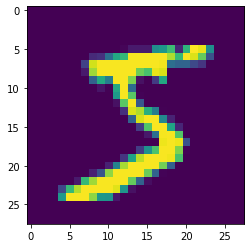

In [5]:
# visualize dataset
import matplotlib.pyplot as plt
plt.imshow(X_train[0])     # display index 0 of training group as an image
plt.show()                

**Normalize and Reshape the Datasets** <br>

In [6]:
X_train = tf.keras.utils.normalize(X_train, axis=1) 
X_test = tf.keras.utils.normalize(X_test, axis=1)   

# need to reshape the data as keras needs 4D datasets, and ours are 3D right now
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# new reshaped dataset
print(X_test.shape)
print(X_train.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


**Building the Model** <br>

In [7]:
# build the model
model = tf.keras.models.Sequential() # most common model

# add the layers

# hidden layers
model.add(tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# flattens out the input layer
model.add(tf.keras.layers.Flatten()) 

# output layer
# last dense layer must have 10 neurons as we have 10 classes
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

2021-10-22 19:09:46.090470: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-22 19:09:46.090737: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Compile and Fit the Model** <br>

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=3) # epoch is the number of passes through the entire training dataset

2021-10-22 19:09:46.300652: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/3
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3575 - accuracy: 0.8936
Epoch 2/3
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0581 - accuracy: 0.9817
Epoch 3/3
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0387 - accuracy: 0.9882


**Calculate Loss and Accuracy using Test Dataset** <br>

In [9]:
# calculate validation loss and accuracy using the test dataset
valLoss, valAcc = model.evaluate(X_test, Y_test)
print(valLoss, valAcc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0424 - accuracy: 0.9868
0.04236653819680214 0.9868000149726868


# Summary of Model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                32010     
Total params: 106,506
Trainable params: 106,506
Non-trainable params: 0
__________________________________________________

In [11]:
predictions = model.predict([X_test])
print(predictions) # prints the probability distributions

[[3.8521797e-10 2.5949685e-09 3.8442313e-06 ... 9.9999619e-01
  2.4481309e-11 1.4073452e-08]
 [1.5301950e-05 4.1903902e-05 9.9915814e-01 ... 5.5063060e-10
  1.2132408e-06 4.4277654e-11]
 [2.3409182e-08 9.9955899e-01 2.7642574e-07 ... 2.0986628e-05
  2.5993427e-06 6.5896181e-08]
 ...
 [3.1387146e-11 1.6194290e-08 2.3085147e-11 ... 2.9830791e-05
  3.5455594e-07 3.0595093e-06]
 [5.4590942e-07 1.1178773e-10 2.3041604e-08 ... 3.9707151e-11
  2.1761144e-03 5.8893587e-08]
 [1.8250759e-05 1.6092495e-09 6.0637276e-06 ... 8.1935528e-11
  9.3911791e-07 1.2700436e-08]]


## Show the handwritten digit and the model prediction

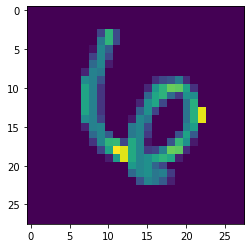

Model Prediction:  6


Paused - press ENTER to continue, q to exit:  


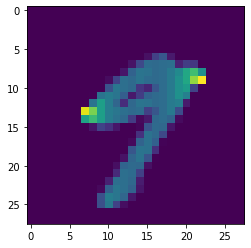

Model Prediction:  7


Paused - press ENTER to continue, q to exit:  


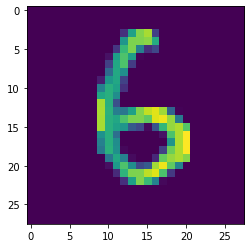

Model Prediction:  6


Paused - press ENTER to continue, q to exit:  


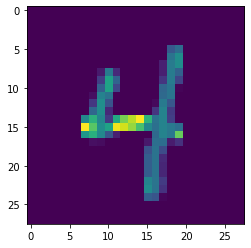

Model Prediction:  4


Paused - press ENTER to continue, q to exit:  q


In [12]:
import random

w, x, y, z = X_test.shape

while(1):
    
    # choose random sample from test dataset
    num1 = random.randint(0, x)
    
    # show sample chosen
    plt.imshow(X_test[num1])
    plt.show()
    
    # show model prediction
    print("Model Prediction: ", np.argmax(predictions[num1]))
    
    # Pause when 'q' is entered
    cont = input('Paused - press ENTER to continue, q to exit: ')
    if cont == 'q':
        break